In [2]:

## Librerias necesarias para esta clase
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
netflix = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2021/2021-04-20/netflix_titles.csv')


In [3]:
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [4]:
## Data eng

netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [6]:
## 1. Visualizar los datos faltantes

netflix.isnull().mean().sort_values(ascending=False)

director        0.306793
cast            0.092205
country         0.065109
date_added      0.001284
rating          0.000899
show_id         0.000000
type            0.000000
title           0.000000
release_year    0.000000
duration        0.000000
listed_in       0.000000
description     0.000000
dtype: float64

In [7]:
(netflix.isnull().mean()*100).sort_values(ascending=False)

director        30.679337
cast             9.220496
country          6.510851
date_added       0.128419
rating           0.089893
show_id          0.000000
type             0.000000
title            0.000000
release_year     0.000000
duration         0.000000
listed_in        0.000000
description      0.000000
dtype: float64

In [9]:
miss_values = (netflix.isnull().mean()*100).sort_values(ascending=False)
miss_values = pd.DataFrame(miss_values.reset_index(name='Total'))

<BarContainer object of 12 artists>

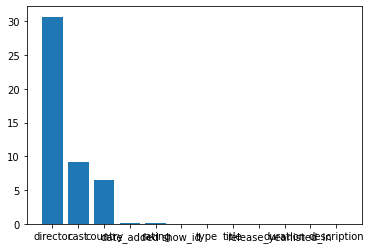

In [10]:
plt.bar('index', 'Total', data=miss_values)

In [12]:
netflix.groupby(['director']).size().sort_values(ascending=False).reset_index(name='Total')

,director,Total
0,"Raúl Campos, Jan Suter",18
1,Marcus Raboy,16
2,Jay Karas,14
3,Cathy Garcia-Molina,13
4,Martin Scorsese,12
...,...,...
4044,"Jon Hurwitz, Hayden Schlossberg",1
4045,Jon Izen,1
4046,Jon J. Whelan,1
4047,"Benjamin Cohen, Nicolas Cotto",1


<AxesSubplot:>

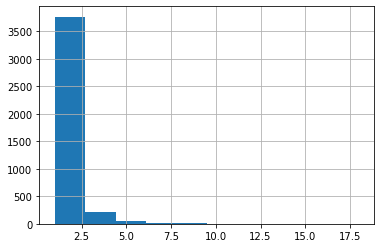

In [13]:
total_directos = netflix.groupby(['director']).size().sort_values(ascending=False).reset_index(name='Total')
total_directos['Total'].hist()

array([[<AxesSubplot:title={'center':'Total'}>]], dtype=object)

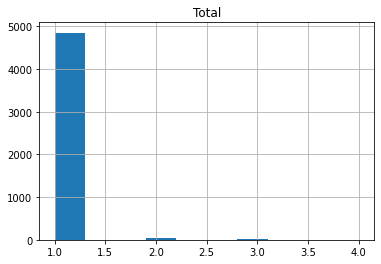

In [15]:
netflix.groupby(['director', 'cast']).size().sort_values(ascending=False).reset_index(name='Total').hist()

array([[<AxesSubplot:title={'center':'Total'}>]], dtype=object)

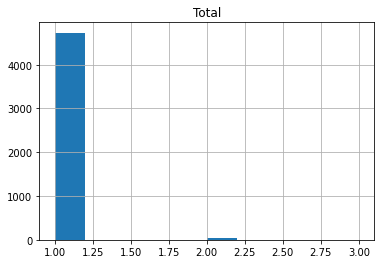

In [16]:
netflix.groupby(['director', 'cast', 'country']).size().sort_values(ascending=False).reset_index(name='Total').hist()

array([[<AxesSubplot:title={'center':'Total'}>]], dtype=object)

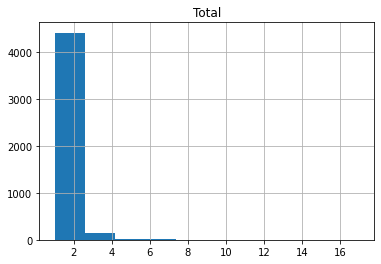

In [17]:
netflix.groupby(['director', 'type', 'rating']).size().sort_values(ascending=False).reset_index(name='Total').hist()

In [18]:
## Borrar nan values

netflix2 = netflix.dropna()

In [19]:
netflix2.describe()

,release_year
count,4808.000000
mean,2012.710275
std,9.521541
min,1942.000000
25%,2011.000000
50%,2016.000000
75%,2018.000000
max,2021.000000


In [20]:
netflix2.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...


In [21]:
netflix2.groupby(['type']).size()

type
Movie      4673
TV Show     135
dtype: int64

<AxesSubplot:>

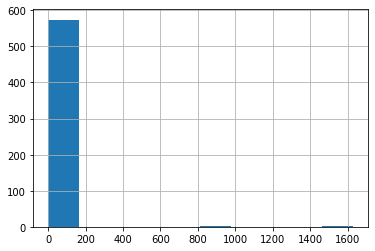

In [24]:
netflix2.groupby(['type', 'country']).size().sort_values(ascending=False).reset_index(name='Total')['Total'].hist()

In [25]:
netflix2.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [26]:
netflix2.groupby(['title']).size()

title
#Alive                           1
#AnneFrank - Parallel Stories    1
#FriendButMarried                1
#FriendButMarried 2              1
#Roxy                            1
                                ..
​Goli Soda 2                     1
​Maj Rati ​​Keteki               1
​Mayurakshi                      1
​​Kuch Bheege Alfaaz             1
반드시 잡는다                          1
Length: 4808, dtype: int64

In [27]:
netflix2.groupby(['title']).size().reset_index()

,title,0
0,#Alive,1
1,#AnneFrank - Parallel Stories,1
2,#FriendButMarried,1
3,#FriendButMarried 2,1
4,#Roxy,1
...,...,...
4803,​Goli Soda 2,1
4804,​Maj Rati ​​Keteki,1
4805,​Mayurakshi,1
4806,​​Kuch Bheege Alfaaz,1


In [28]:
netflix2['title'].str.replace('#','')

1             7:19
2            23:59
3                9
4               21
5               46
           ...    
7778    Zombieland
7780           Zoo
7781          Zoom
7782          Zozo
7783        Zubaan
Name: title, Length: 4808, dtype: object

In [29]:
netflix2['title']=netflix2['title'].str.replace('#','')

C:\Users\DANILO\AppData\Local\Temp/ipykernel_22148/179978720.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix2['title']=netflix2['title'].str.replace('#','')


In [30]:
netflix2.groupby(['title']).size().reset_index()

,title,0
0,1 Chance 2 Dance,1
1,1 Mile to You,1
2,10 Days in Sun City,1
3,10 jours en or,1
4,"10,000 B.C.",1
...,...,...
4803,​Goli Soda 2,1
4804,​Maj Rati ​​Keteki,1
4805,​Mayurakshi,1
4806,​​Kuch Bheege Alfaaz,1
